In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#load dataset
df = pd.read_csv('cleaned_data.csv') 
df = df.drop(['Unnamed: 0'], axis = 1)
print(df.shape)
df.describe()

(429, 57)


,1.1.4) Gender gap in internet access,1.2.2) Average fixed broadband download speed,1.2.7) Bandwidth capacity,1.3.1) Network coverage (min. 2G),1.3.2) Network coverage (min. 3G),1.3.3) Network coverage (min. 4G),1.3.5) Government initiatives to make Wi-Fi available,1.3.6) Private sector initiatives to make Wi-Fi available,1.4.1) Urban electricity access,1.4.2) Rural electricity access,...,BG11) Democracy Index,BG12) Corruption Perceptions Index,BG13) EIU Business Environment Rankings,BG14) UN E-Government Development Index,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG24) Total fixed line broadband subscribers
count,429.000000,429.000000,4.290000e+02,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,15.687879,39.207133,1.426804e+05,95.944149,86.986760,68.728811,1.596737,1.317016,91.700723,76.791282,...,5.796037,45.398601,5.932634,0.600699,6.082284,5.783217,56.037529,6.764211,6.334652,143737.376584
std,18.807892,38.214072,8.785347e+05,7.394996,18.044832,33.534190,0.750756,0.881913,16.405713,34.173803,...,2.065359,19.028559,1.301583,0.211303,6.387836,7.644111,29.026809,10.831653,10.566943,141649.182669
min,-16.700000,2.530000,4.990000e+02,50.000000,20.000000,0.000000,0.000000,0.000000,16.400000,0.360000,...,1.100000,14.000000,2.900000,0.100000,-9.000000,-9.000000,2.700000,0.014786,0.005915,11.890606
25%,2.100000,11.580000,1.474600e+04,95.610000,80.000000,40.350000,2.000000,0.000000,93.000000,59.710000,...,3.900000,31.000000,5.000000,0.400000,2.000000,1.000000,27.100000,0.989583,0.704698,13201.259796
50%,8.800000,23.440000,4.431900e+04,99.000000,95.000000,83.050000,2.000000,2.000000,100.000000,98.150000,...,6.100000,40.000000,5.700000,0.600000,5.000000,4.000000,61.800000,2.072650,1.660156,95671.875000
75%,27.300000,54.930000,8.439200e+04,99.920000,99.500000,98.500000,2.000000,2.000000,100.000000,100.000000,...,7.500000,59.000000,6.900000,0.800000,10.000000,9.900000,81.900000,8.173913,7.583333,276839.473684
max,86.700000,203.510000,1.438529e+07,100.000000,100.000000,100.000000,2.000000,2.000000,100.000000,100.000000,...,9.400000,90.000000,8.500000,1.000000,28.000000,59.000000,99.700000,69.230769,65.384615,460790.588235


In [3]:
df.columns

Index(['1.1.4) Gender gap in internet access',
       '1.2.2) Average fixed broadband download speed',
       '1.2.7) Bandwidth capacity', '1.3.1) Network coverage (min. 2G)',
       '1.3.2) Network coverage (min. 3G)',
       '1.3.3) Network coverage (min. 4G)',
       '1.3.5) Government initiatives to make Wi-Fi available',
       '1.3.6) Private sector initiatives to make Wi-Fi available',
       '1.4.1) Urban electricity access', '1.4.2) Rural electricity access',
       '2.1.1) Smartphone cost (handset)',
       '2.1.2) Mobile phone cost (prepaid tariff)',
       '2.1.3) Mobile phone cost (postpaid tariff)',
       '2.1.4) Fixed-line monthly broadband cost',
       '2.2.2) Wireless operators' market share',
       '2.2.3) Broadband operators' market share',
       '3.1.1) Availability of local news in local languages',
       '3.1.2) Concentration of websites using country-level domains',
       '3.1.3) Availability of e-Government services in the local language',
       '3.2.1) e

## Separation of targets

In [4]:
y_gini = df['BG5) GINI coefficient']
y_peace = df['BG10) Global Peace Index']
y_dem = df['BG11) Democracy Index']
y_corr = df['BG12) Corruption Perceptions Index']

In [5]:
target_column = ['BG5) GINI coefficient', 'BG10) Global Peace Index', 'BG11) Democracy Index', 'BG12) Corruption Perceptions Index'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,1.1.4) Gender gap in internet access,1.2.2) Average fixed broadband download speed,1.2.7) Bandwidth capacity,1.3.1) Network coverage (min. 2G),1.3.2) Network coverage (min. 3G),1.3.3) Network coverage (min. 4G),1.3.5) Government initiatives to make Wi-Fi available,1.3.6) Private sector initiatives to make Wi-Fi available,1.4.1) Urban electricity access,1.4.2) Rural electricity access,...,BG11) Democracy Index,BG12) Corruption Perceptions Index,BG13) EIU Business Environment Rankings,BG14) UN E-Government Development Index,BG17) Internet access gender gap,BG18) Mobile phone access gender gap,BG19) Internet users (percent of population),BG20) Male internet users,BG21) Female internet users,BG24) Total fixed line broadband subscribers
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,...,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.180944,0.192655,0.009918,0.959441,0.869868,0.687288,0.798368,0.658508,0.917007,0.767913,...,5.796037,45.398601,0.697957,0.600699,0.217224,0.098021,0.562061,0.097705,0.096883,0.311936
std,0.216931,0.187775,0.061072,0.073950,0.180448,0.335342,0.375378,0.440956,0.164057,0.341738,...,2.065359,19.028559,0.153127,0.211303,0.228137,0.129561,0.291142,0.156457,0.161612,0.307405
min,-0.192618,0.012432,0.000035,0.500000,0.200000,0.000000,0.000000,0.000000,0.164000,0.003600,...,1.100000,14.000000,0.341176,0.100000,-0.321429,-0.152542,0.027081,0.000214,0.000090,0.000026
25%,0.024221,0.056901,0.001025,0.956100,0.800000,0.403500,1.000000,0.000000,0.930000,0.597100,...,3.900000,31.000000,0.588235,0.400000,0.071429,0.016949,0.271815,0.014294,0.010778,0.028649
50%,0.101499,0.115179,0.003081,0.990000,0.950000,0.830500,1.000000,1.000000,1.000000,0.981500,...,6.100000,40.000000,0.670588,0.600000,0.178571,0.067797,0.619860,0.029938,0.025391,0.207625
75%,0.314879,0.269913,0.005867,0.999200,0.995000,0.985000,1.000000,1.000000,1.000000,1.000000,...,7.500000,59.000000,0.811765,0.800000,0.357143,0.167797,0.821464,0.118068,0.115980,0.600792
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.400000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
X = df[predictors].values

### Adjusted R square function

In [7]:
def get_adj_r_squared(r2, n, p):
  adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
  return adj_r2

## Gini coefficient - ElasticNet model

In [8]:
#create new slice of data
X_gini = df['BG24) Total fixed line broadband subscribers']

In [9]:
X_gini = np.array(X_gini).reshape(-1, 1)

In [10]:
X_gini_train, X_gini_test, y_gini_train, y_gini_test = train_test_split(X_gini, y_gini, test_size=0.20, random_state=40)
print(X_gini_train.shape)
print(X_gini_test.shape)

(343, 1)
(86, 1)


In [11]:
# define model
model_elastic = ElasticNet()
# define model evaluation method
cv_elastic = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_elastic_gini = GridSearchCV(model_elastic, grid, scoring='neg_root_mean_squared_error', cv=cv_elastic, n_jobs=-1)
# perform the search
results_gini = search_elastic_gini.fit(X_gini, y_gini)

In [12]:
pred_train_enet_gini= search_elastic_gini.predict(X_gini_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_gini_train,pred_train_enet_gini)))
print("R^2 for training set", r2_score(y_gini_train, pred_train_enet_gini))

pred_test_enet_gini= search_elastic_gini.predict(X_gini_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_gini_test,pred_test_enet_gini)))
print("R^2 for test set", get_adj_r_squared(r2_score(y_gini_test, pred_test_enet_gini),429,1))

RMSE score for training set 6.886712222979056
R^2 for training set 0.2261658383865216
RMSE score for test set 6.452150466474243
R^2 for test set -0.02985905526108734


## World Peace - ElasticNet model

In [13]:
#create new slice of data
predictors_peace = ['1.1.4) Gender gap in internet access','1.2.2) Average fixed broadband download speed', '2.1.1) Smartphone cost (handset)', '3.2.6) e-Commerce content', 'BG9) Percentage of schools with Internet access', 'BG24) Total fixed line broadband subscribers']
df[predictors_peace] = df[predictors_peace]/df[predictors_peace].max()

In [14]:
X_peace = df[predictors_peace].values

In [15]:
X_peace_train, X_peace_test, y_peace_train, y_peace_test = train_test_split(X_peace, y_peace, test_size=0.20, random_state=40)
print(X_peace_train.shape)
print(X_peace_test.shape)

(343, 6)
(86, 6)


In [16]:
# define model
model_elastic = ElasticNet()
# define model evaluation method
cv_elastic = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search_elastic_peace = GridSearchCV(model_elastic, grid, scoring='neg_root_mean_squared_error', cv=cv_elastic, n_jobs=-1)
# perform the search
results_peace = search_elastic_peace.fit(X_peace, y_peace)

In [17]:
pred_train_enet_peace= search_elastic_peace.predict(X_peace_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_peace_train,pred_train_enet_peace)))
print("R^2 for training set", r2_score(y_peace_train, pred_train_enet_peace))

pred_test_enet_peace= search_elastic_peace.predict(X_peace_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_peace_test,pred_test_enet_peace)))
print("R^2 for test set", get_adj_r_squared(r2_score(y_peace_test, pred_test_enet_peace),429,6))

RMSE score for training set 0.37647052269151243
R^2 for training set 0.2980447610298588
RMSE score for test set 0.3776987514386919
R^2 for test set 0.32569972222573595


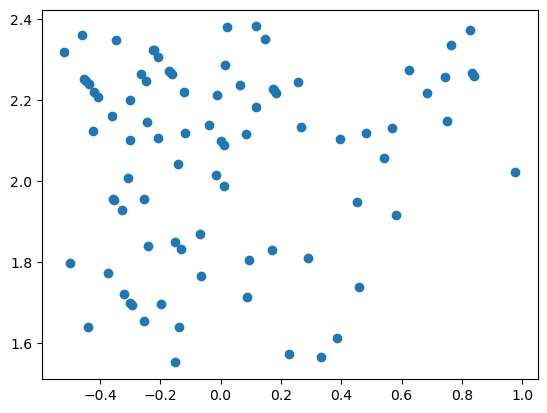

In [18]:
residuals = y_peace_test - pred_test_enet_peace
plt.scatter(residuals, pred_test_enet_peace)
plt.show()

In [19]:
vif_data_peace = pd.DataFrame()
vif_data_peace["feature"] = predictors_peace
  
# calculating VIF for each feature
vif_data_peace["VIF"] = [variance_inflation_factor(X_peace, i)
                          for i in range(len(predictors_peace))]
vif_data_peace

,feature,VIF
0,1.1.4) Gender gap in internet access,1.579659
1,1.2.2) Average fixed broadband download speed,4.863063
2,2.1.1) Smartphone cost (handset),16.073119
3,3.2.6) e-Commerce content,32.226466
4,BG9) Percentage of schools with Internet access,14.911012
5,BG24) Total fixed line broadband subscribers,8.484875


In [20]:
variables = list(df[predictors].columns)
coefficients_elastic_peace = search_elastic_peace.best_estimator_.coef_

In [21]:
for (colname, coef) in zip(variables, coefficients_elastic_peace):
  print(colname, ":", coef)

3.2.3) e-Health content : -0.0
4.3.1.1) Comprehensive female e-inclusion plan : -0.27357473298892504
4.3.6) National digital identification system : -0.21575681171714836
BG14) UN E-Government Development Index : -0.09162126177582165
BG18) Mobile phone access gender gap : -0.08758919822582027
1.4.1) Urban electricity access : -0.3346058750320962


## Democracy Index - Ridge model

In [22]:
#create new slice of data
predictors_dem = ['1.2.2) Average fixed broadband download speed', '2.1.1) Smartphone cost (handset)', '2.2.3) Broadband operators\' market share', '3.2.6) e-Commerce content', '4.1.2) Educational attainment', '4.2.5) Trust in information from social media', 'BG9) Percentage of schools with Internet access','BG10) Global Peace Index', 'BG11) Democracy Index', 'BG12) Corruption Perceptions Index', 'BG24) Total fixed line broadband subscribers']
df[predictors_dem] = df[predictors_dem]/df[predictors_dem].max()

In [23]:
X_dem = df[predictors_dem].values

In [24]:
X_dem_train, X_dem_test, y_dem_train, y_dem_test = train_test_split(X_dem, y_dem, test_size=0.20, random_state=40)
print(X_dem_train.shape)
print(X_dem_test.shape)

(343, 11)
(86, 11)


In [25]:
# define model evaluation method
cv_ridge = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
alphas = np.arange(0, 1, 0.01)
# define search
search_dem = RidgeCV(alphas=alphas, scoring='neg_root_mean_squared_error', cv=cv_ridge)
# perform the search
results_dem = search_dem.fit(X_dem, y_dem)

In [26]:
pred_train_rdem = search_dem.predict(X_dem_train)
print("RMSE score for training set", np.sqrt(mean_squared_error(y_dem_train,pred_train_rdem)))
print("R^2 for training set", r2_score(y_dem_train, pred_train_rdem))

pred_test_rdem= search_dem.predict(X_dem_test)
print("RMSE score for test set", np.sqrt(mean_squared_error(y_dem_test,pred_test_rdem))) 
print("R^2 for test set", get_adj_r_squared(r2_score(y_dem_test, pred_test_rdem),429,11))

RMSE score for training set 4.124225781564681e-15
R^2 for training set 1.0
RMSE score for test set 4.345696471103035e-15
R^2 for test set 1.0


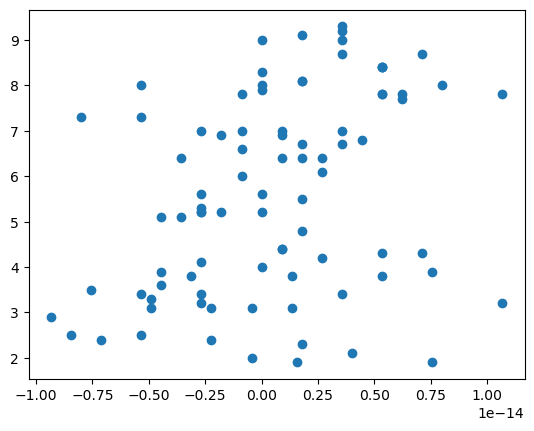

In [27]:
residuals = y_dem_test - pred_test_rdem
plt.scatter(residuals, pred_test_rdem)
plt.show()

In [28]:
vif_data_dem = pd.DataFrame()
vif_data_dem["feature"] = predictors_dem
  
# calculating VIF for each feature
vif_data_dem["VIF"] = [variance_inflation_factor(X_dem, i)
                          for i in range(len(predictors_dem))]
vif_data_dem

,feature,VIF
0,1.2.2) Average fixed broadband download speed,5.032462
1,2.1.1) Smartphone cost (handset),18.205773
2,2.2.3) Broadband operators' market share,7.535097
3,3.2.6) e-Commerce content,61.913005
4,4.1.2) Educational attainment,40.314049
5,4.2.5) Trust in information from social media,11.056457
6,BG9) Percentage of schools with Internet access,15.545295
7,BG10) Global Peace Index,17.651684
8,BG11) Democracy Index,17.821799
9,BG12) Corruption Perceptions Index,32.333145


## Corruption Index - Multivariate model

In [29]:
#create new slice of data
predictors_corr = ['1.1.4) Gender gap in internet access','1.2.2) Average fixed broadband download speed', '2.1.1) Smartphone cost (handset)', '3.2.6) e-Commerce content', '4.1.3) Support for digital literacy', '4.3.1.2) Female digital skills training plan', 'BG9) Percentage of schools with Internet access', 'BG19) Internet users (percent of population)', 'BG24) Total fixed line broadband subscribers']
df[predictors_corr] = df[predictors_corr]/df[predictors_corr].max()

In [30]:
X_corr = df[predictors_corr].values

In [31]:
X_corr_train, X_corr_test, y_corr_train, y_corr_test = train_test_split(X_corr, y_corr, test_size=0.20, random_state=40)
print(X_corr_train.shape)
print(X_corr_test.shape)

(343, 9)
(86, 9)


In [32]:
model_corr = LinearRegression()
model_corr.fit(X_corr_train, y_corr_train)

LinearRegression()

In [33]:
pred_corr_train_lr= model_corr.predict(X_corr_train)
print("RMSE for training data", np.sqrt(mean_squared_error(y_corr_train,pred_corr_train_lr)))
print("Coefficient of Determination for training data", r2_score(y_corr_train, pred_corr_train_lr))

RMSE for training data 10.174538563020054
Coefficient of Determination for training data 0.7076855809940987


In [34]:
pred_corr_test_lr= model_corr.predict(X_corr_test)
print("RMSE for testing data", np.sqrt(mean_squared_error(y_corr_test,pred_corr_test_lr))) 
print("Coefficient of Determination for test data", get_adj_r_squared(r2_score(y_corr_test, pred_corr_test_lr), 429, 9))

RMSE for testing data 10.621930688509456
Coefficient of Determination for test data 0.7034413842590614


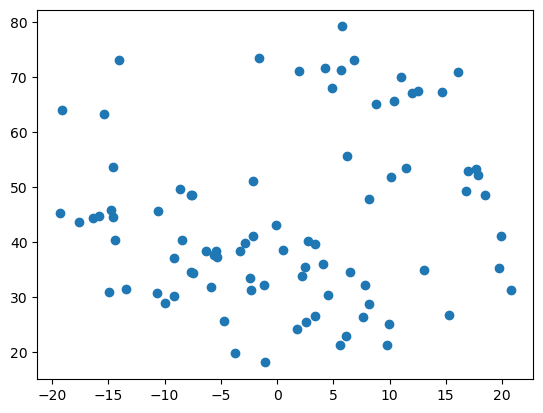

In [35]:
residuals = y_corr_test - pred_corr_test_lr
plt.scatter(residuals, pred_corr_test_lr)
plt.show()

In [36]:
vif_data_corr = pd.DataFrame()
vif_data_corr["feature"] = predictors_corr
  
# calculating VIF for each feature
vif_data_corr["VIF"] = [variance_inflation_factor(X_corr, i)
                          for i in range(len(predictors_corr))]
vif_data_corr

,feature,VIF
0,1.1.4) Gender gap in internet access,1.887958
1,1.2.2) Average fixed broadband download speed,4.942653
2,2.1.1) Smartphone cost (handset),18.651407
3,3.2.6) e-Commerce content,43.773667
4,4.1.3) Support for digital literacy,9.810722
5,4.3.1.2) Female digital skills training plan,1.743904
6,BG9) Percentage of schools with Internet access,17.043512
7,BG19) Internet users (percent of population),30.432051
8,BG24) Total fixed line broadband subscribers,9.149074
